# Kickstarter Campaigns
## An analysis with interactive visualizations

### Here are the questions answered below:
1. What percentage of campaign succeed or fail?
2. How many campaigns per year have there been on Kickstarter since 2009?
3. How many campaigns in each category have there been on Kickstarter since 2009 per year? and how many were successful?
4. How many total backers per category since 2009? (credence to the crowd-sourcing claim)
5. What is the average run time per campaign? How quickly do you know if your campaign will succeed or fail?
6. How global is the Kickstarter community? How much has each country contributed?
7. Which campaign categories are more popular during which months? and which campaign categories raise more money during which months?

#### Data: https://www.kaggle.com/kemical/kickstarter-projects

In [46]:
import numpy as np
import pandas as pd
from time import time

from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

import datetime
import pycountry

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



In [47]:
# Load the dataset
ks_data = pd.read_csv("ks-projects-201801.csv")

# Display the first records
display(ks_data.head(n=5))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [48]:
#check the shape of the data set
num_rows, num_cols  = ks_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 15
Number of rows: 378661


In [49]:
ks_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [50]:
ks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [51]:
#check for missing values
missing_values_count = ks_data.isnull().sum()
missing_values_count


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [52]:
# how many total missing values do we have?
total_cells = np.product(ks_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}'.format(missing_percent))

Percent of missing data = 0.06692001552840139


# Comment: 
We can see that the amount of missing values is very little. However, I always check all the string string value columns for 'weird' characters to clean the data. (sometimes, they contain different values to mean unkown or unavailable without necessarily leaving it empty or with NA) 

*Keeping track of all the weirdness here:*

**name:** 
Canceled (Canceled), N/A (Canceled), Cancelled (Canceled), a (Canceled), Project (Canceled)

**state:**
canceled, suspended, undefined, live

**country:**
N,0"


Now that we see that there are many different forms and characters, I'd like to delete them so that they do not mess up the rest of the analysis. However, I'd like to see the distribution and total number of campaigns before I remove them. 



# 1. What percentage of campaign succeed or fail?

In [53]:
#before I delete the different states, I want to see the distribution
success_percent = round(ks_data["state"].value_counts() / len(ks_data["state"]) * 100,2)

print("Success_Percent in %: ")
print(success_percent)

state = round(ks_data["state"].value_counts() / len(ks_data["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace_0 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribution of Success Status on Kickstarter campaigns', legend=dict(orientation="h"));

fig = go.Figure(data=[trace_0], layout=layout)
iplot(fig)

Success_Percent in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


# Comment
It's fascinating that more campaign fail than succeed and by a relatively big margin. 
For this analysis, I will focus on success and failure and will chose to remove canceled, suspended, live and undefined campaigns.




# 2. How many campaign per year have there been on Kickstarter since 2009?

In [54]:
#Create new column to extract the year
ks_data['launched_year'] = pd.to_datetime(ks_data['launched']).dt.year

#count total number of campaign per year
total_campaigns = ks_data['ID'].groupby(ks_data['launched_year']).count()
total_campaigns

launched_year
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
2018      124
Name: ID, dtype: int64

In [55]:
# we have a couple random ones from apparently the year 1970, I will delete those rows:
ks_data = ks_data[ks_data.launched_year != 1970]

In [56]:
#Plot the number of campaign per year
data = [go.Bar(
          x= [ 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
          y=total_campaigns,
          marker=dict(
            color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
               27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
            colorscale='Viridis',
            reversescale = True))]

layout = go.Layout(
    dict(title= 'Total number of Campaigns on Kickstarter per Year', 
         showlegend=False),
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Ariel',
            size=14,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Total number of campaigns in Thousands',
        titlefont=dict(
            
            family='Ariel',
            size=14,
            color='#7f7f7f'
            
        )
    )
)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Comment
Wow that is a lot of campaigns, Now I want to take a deeper look at how many campaign succeed and how many fail.

But before, we have to do some more data cleanup. including removing the 'weird' characters and adjusting the time information.

In [57]:
# drop rows with'weird characters' in it
#name: Canceled (Canceled), N/A (Canceled),
#Cancelled (Canceled), a (Canceled), Project (Canceled)

#state: canceled, suspended, undefined, live

#country: N,0"
ks_data = ks_data[ks_data.name != 'Canceled (Canceled)']
ks_data = ks_data[ks_data.name != 'N/A (Canceled)']
ks_data = ks_data[ks_data.name != 'Cancelled (Canceled)']
ks_data = ks_data[ks_data.name != 'a (Canceled)']
ks_data = ks_data[ks_data.name != 'Project (Canceled)']

#State
ks_data = ks_data[ks_data.state != 'canceled']
ks_data = ks_data[ks_data.state != 'suspended']
ks_data = ks_data[ks_data.state != 'undefined']
ks_data = ks_data[ks_data.state != 'live']

#country
ks_data = ks_data[ks_data.country != 'N,0"']

#drop na
ks_data.dropna(axis=0, how='all',inplace=True)

In [58]:
#check the shape of the data set
num_rows, num_cols  = ks_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 16
Number of rows: 331465


In [59]:
#Now it's time to transform the date data to date format. some include the time, so it needs to be fixed

ks_data['deadline_date'] = pd.to_datetime(ks_data['deadline']).dt.date
ks_data['deadline_month'] = pd.to_datetime(ks_data['deadline']).dt.month

ks_data['launched_date'] = pd.to_datetime(ks_data['launched']).dt.date
ks_data['launched_time'] = pd.to_datetime(ks_data['launched']).dt.time
ks_data['launched_month'] = pd.to_datetime(ks_data['launched_date']).dt.month


# Comment
This information is from the data read me files:

You'll find most useful data for project analysis. Columns are self explanatory except:
usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

this tells us that the data is mostly duplicated, I will proceed using the us_pledged_real and usd_goal_real to reflect the accurate amount in US dollar and to keep the scale consistent.

In [60]:
#drop duplicate columns including the ones with empty values  
col_drop = ['usd pledged', 'goal', 'pledged',
            'deadline', 'launched']
for col in col_drop:
    ks_data.drop(col, axis=1, inplace=True)



In [61]:
ks_data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'state',
       'backers', 'country', 'usd_pledged_real', 'usd_goal_real',
       'launched_year', 'deadline_date', 'deadline_month', 'launched_date',
       'launched_time', 'launched_month'],
      dtype='object')

### let's dive into the campaigns and look at their success or lack thereof. 
#  3. How many campaigns in each category have there been on Kickstarter since 2009 per year ?  and how many were successful?

In [62]:
main_catigs = ks_data["main_category"].value_counts()
#separate the data into failed and successful campaigns
main_catigs_failed = ks_data[ks_data["state"] == "failed"]["main_category"].value_counts()
main_catigs_success = ks_data[ks_data["state"] == "successful"]["main_category"].value_counts()

print('Main Successful Categories :')
print (main_catigs_success)

print('Main Not-So- Successful Categories :')
print (main_catigs_failed)

Main Successful Categories :
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64
Main Not-So- Successful Categories :
Film & Video    32892
Publishing      23113
Music           21696
Technology      20613
Games           16003
Food            15969
Design          14814
Fashion         14181
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3136
Dance            1235
Name: main_category, dtype: int64


In [63]:
#number of campaigns per category plot
trace_0 = go.Bar(
    x=main_catigs.index,
    y=main_catigs.values,
    name="Number of Campaigns per Category",
    marker=dict(
        color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
               27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        
    colorscale='Viridis')
    
)


data = [trace_0]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(showlegend=False, 
                     title="Total number of campaigns on Kickstarter per category since 2009",
                     bargap=0.05)





#fig = go.Figure(data=data)
iplot(fig, filename='basic-bar')

## How many campaigns were Successful throughout the years (per category)? 

In [64]:
#Successful campaign vs. failed campaigns
#First plot
trace_0 = go.Bar(
    x=main_catigs_failed.index,
    y=main_catigs_failed.values,
    name="Failed Categories",
    marker = dict(
            color = '#fde725')
    
)
#Second plot
trace_1 = go.Bar(
    x=main_catigs_success.index,
    y=main_catigs_success.values,
    name="Success Categories",
    marker=dict(
        color= '#424086')
    
)



data = [trace_0, trace_1]
layout = go.Layout(
    barmode='group'
        
    
)

fig = go.Figure(data=data, layout=layout)


fig['layout'].update(showlegend=True, title="Number of Successful and Failed Campaigns on Kickstarter per Category",
                     bargap=0.05)

iplot(fig, filename='grouped-bar')


# 4. How many total backers per category since 2009? (credence to the crowd-sourcing claim)

In [65]:
num_backers = ks_data.groupby(['main_category']).backers.sum()

num_backers_failed = ks_data[ks_data["state"] == "failed"].groupby(['main_category']).backers.sum()
num_backers_success = ks_data[ks_data["state"] == "successful"].groupby(['main_category']).backers.sum()
print('Number of Backers in Successful Campaigns :')
print (num_backers_success)

print('Number of Backers in Not-So- Successful Campaigns :')
print (num_backers_failed)

Number of Backers in Successful Campaigns :
main_category
Art              1040022
Comics           1351864
Crafts            199124
Dance             148220
Design           6485969
Fashion          1213688
Film & Video     3603935
Food             1098695
Games           10194460
Journalism        154134
Music            2472579
Photography       359407
Publishing       1953524
Technology       4617545
Theater           460684
Name: backers, dtype: int64
Number of Backers in Not-So- Successful Campaigns :
main_category
Art             124655
Comics           86455
Crafts           34252
Dance            11816
Design          467361
Fashion         139896
Film & Video    497340
Food            201480
Games           703519
Journalism       24513
Music           199980
Photography      59448
Publishing      235766
Technology      417730
Theater          42800
Name: backers, dtype: int64


In [67]:
#First plot
trace_0 = go.Bar(
    x=num_backers_failed.index,
    y=num_backers_failed.values,
    name="Number of Backers for Failed Categories",
    marker=dict(
        color=  '#fde725')
)
#Second plot
trace_1 = go.Bar(
    x=num_backers_success.index,
    y=num_backers_success.values,
    name="Number of Backers for Success Categories",
    marker=dict(
        color= '#440154')
)



data = [trace_0, trace_1]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)


fig['layout'].update(showlegend=True, 
                     title="Number of backers for Successful and Failed Campaigns on Kickstarter per Category since 2009",
                     bargap=0.05)

iplot(fig, filename='grouped-bar')


# 5. What is the average run time per campaign? How quickly do you know if your campaign will succeed or fail?

In [68]:
#create new columns to calculate how many days does an average campaign run
ks_data['run_time'] = ks_data['deadline_date'] - ks_data['launched_date']
ks_data['run_time']= ks_data['run_time'].dt.days

In [69]:
ks_data['run_time'].value_counts()

30    148369
60     27955
45     15237
31     11710
35      8614
40      8589
32      6463
21      6123
20      6057
29      5537
25      5515
33      5069
15      4856
28      4845
14      3844
34      3207
36      3016
27      2653
22      2461
26      2373
24      2304
37      2276
50      2193
10      2080
23      2061
38      1908
46      1806
42      1731
39      1681
7       1641
       ...  
3        194
2        129
63       124
66       107
88       105
65       105
70        98
1         92
64        83
71        82
75        81
76        75
72        74
67        69
68        61
87        61
80        59
86        59
69        57
85        56
81        49
78        49
73        49
83        47
84        47
82        46
77        45
74        43
79        35
92        22
Name: run_time, Length: 92, dtype: int64

In [70]:
num_days = ks_data.groupby(['main_category']).run_time.mean()

num_days_failed = ks_data[ks_data["state"] == "failed"].groupby(['main_category']).run_time.mean()
num_days_success = ks_data[ks_data["state"] == "successful"].groupby(['main_category']).run_time.mean()
print('Average Number of Days in Successful Campaigns :')
print (num_days_success)

print('Average Number of Days in Not-So- Successful Campaigns :')
print (num_days_failed)

Average Number of Days in Successful Campaigns :
main_category
Art             30.340052
Comics          31.908593
Crafts          29.026950
Dance           31.814799
Design          33.468101
Fashion         31.309136
Film & Video    32.310308
Food            31.511586
Games           29.912766
Journalism      32.036561
Music           33.885999
Photography     32.137368
Publishing      32.012195
Technology      34.160112
Theater         31.615702
Name: run_time, dtype: float64
Average Number of Days in Not-So- Successful Campaigns :
main_category
Art             33.955629
Comics          36.651883
Crafts          32.345082
Dance           34.703644
Design          34.616579
Fashion         33.127142
Film & Video    36.947768
Food            34.804621
Games           34.021683
Journalism      34.964923
Music           36.890717
Photography     34.228070
Publishing      34.641025
Technology      35.607675
Theater         36.304207
Name: run_time, dtype: float64


In [71]:
#First plot
trace_0 = go.Scatter(
    x=num_days_failed.index,
    y=num_days_failed.values,
    name="Number of months for Failed Categories",
    marker=dict(
        color= '#d8e219')
)
#Second plot
trace_1 = go.Scatter(
    x=num_days_success.index,
    y=num_days_success.values,
    name="Number of months for Success Categories",
    marker=dict(
        color= '#424086')
)



data = [trace_0, trace_1]



fig = go.Figure(data=data)


fig['layout'].update(showlegend=True, title="Average number of days for Successful and Failed Campaigns on Kickstarter per Category",
                     bargap=0.05)

iplot(fig, filename= 'basic-line') 

# Comment
This  information is very interesting, we can see that most campaign either succeed or fail within a month. This means that anyone who has a campaign must be focused particularly within the first 30 days as those seem to be the most crucial.
let's get a different perspective to confirm these findings.

In [72]:
# calculate how many months each campaign runs on average I need to 
# Conversting the days into months was producing negative numbers, so i went with this solution to speed up the process
ks_data['launched_date'] = pd.to_datetime(ks_data['launched_date'])
ks_data['launched_date_month'] = ks_data['launched_date'].dt.to_period("M")


ks_data['deadline_date'] = pd.to_datetime(ks_data['deadline_date'])
ks_data['deadline_date_month'] = ks_data['deadline_date'].dt.to_period("M")

#Creating a new columns with Campaign total months
ks_data['run_time_months'] = ks_data['deadline_date_month'] - ks_data['launched_date_month']
ks_data['run_time_months'] = ks_data['run_time_months'].astype(int)

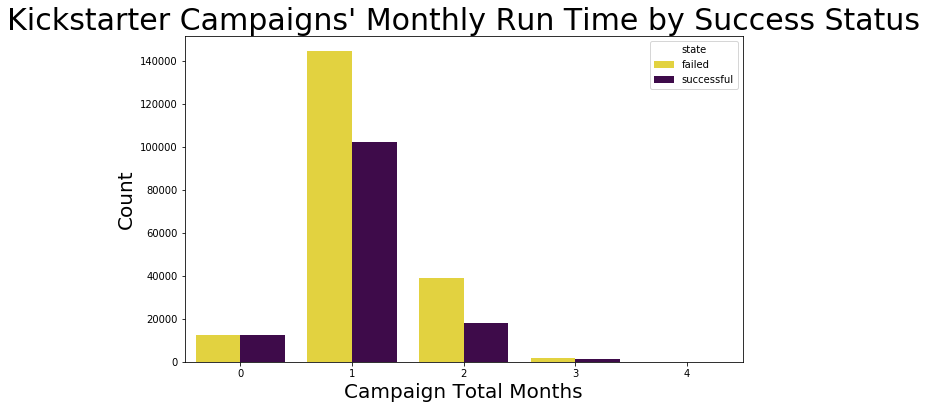

Descriptions of Campaign Time x State
state            failed  successful
run_time_months                    
0                 12266       12483
1                144415      102023
2                 38944       18225
3                  1976        1117
4                    13           3


In [76]:
#Use sns to plot the distribution of the run time 
plt.figure(figsize = (10,6))

colors = ['#fde725','#440154']
ax = sns.countplot(x='run_time_months', hue='state', 
                   data=ks_data[ks_data['run_time_months'] < 10], palette= colors)
ax.set_title("Kickstarter Campaigns' Monthly Run Time by Success Status", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(ks_data[ks_data['run_time_months'] < 5]['run_time_months'], ks_data.state))

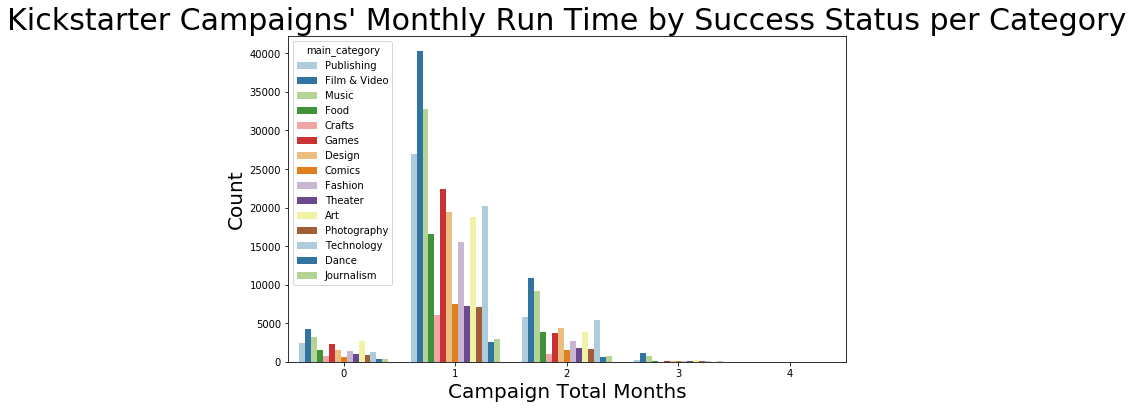

Descriptions of Campaign Time x State
main_category      Art  Comics  Crafts  Dance  Design  Fashion  Film & Video  \
run_time_months                                                                
0                 2732     656     728    378    1472     1439          4270   
1                18750    7547    6101   2564   19483    15525         40282   
2                 3927    1578     978    600    4353     2756         10859   
3                  231      97      11     31      55       54          1090   
4                    1       0       0      0       0        0             3   

main_category     Food  Games  Journalism  Music  Photography  Publishing  \
run_time_months                                                             
0                 1541   2277         370   3169          838        2498   
1                16592  22389        2946  32726         7113       26889   
2                 3854   3786         783   9148         1621        5779   
3               

In [77]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='run_time_months', hue='main_category', 
                   data=ks_data[ks_data['run_time_months'] < 10], palette = 'Paired')
ax.set_title("Kickstarter Campaigns' Monthly Run Time by Success Status per Category", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(ks_data[ks_data['run_time_months'] < 5]['run_time_months'], ks_data.main_category))

# Comment
This is really interesting, it is confirmed that most campaign finish within a month, and that is also regardless of category. I now wonder how international are those kickstarter campaigns?

# 6. How global is the Kickstarter community? How much has each country contributed? 

In [78]:
#first to build a choropleth map, I have to adjust some country codes 
#convert country code from 2 letter to 3 letter to map it out correctly
import pycountry

input_countries = ['US', 'GB', 'CA','AU','DE','FR','IT','NL',
                   'ES','SE','MX','NZ','DK','IE','CH','NO','HK',   
                   'BE','AT','SG','LU','JP']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
 
codes = sorted(codes)
print (codes)  # prints ['AUS', 'AUT', 'BEL', etc..]

['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'DEU', 'DNK', 'ESP', 'FRA', 'GBR', 'HKG', 'IRL', 'ITA', 'JPN', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL', 'SGP', 'SWE', 'USA']


In [79]:
# get country names to add to the legend
input_countries = ['US', 'GB', 'CA','AU','DE','FR','IT','NL',
                   'ES','SE','MX','NZ','DK','IE','CH','NO','HK',   
                   'BE','AT','SG','LU','JP']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

codes_names = [countries.get(country, 'Unknown code') for country in input_countries]
codes_names = sorted(codes_names)
print (codes_names)

['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Hong Kong', 'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


In [80]:
#Figure the amount pledged per country 
# this gives an ordered list by alphabet, so I had to adjust the codes and country codes to alhpabetical order to line up
total_pledged_by_country = ks_data.groupby(['country']).usd_pledged_real.sum()


country_percent_per_pledge = total_pledged_by_country/ks_data['usd_pledged_real'].sum() *100

print(total_pledged_by_country)

print(country_percent_per_pledge)

country
AT    9.152086e+06
AU    4.308827e+07
BE    4.083094e+06
CA    8.589252e+07
CH    1.239121e+07
DE    3.718813e+07
DK    7.135941e+06
ES    1.172830e+07
FR    3.283228e+07
GB    2.260742e+08
HK    9.158679e+06
IE    3.945442e+06
IT    1.387469e+07
JP    8.481102e+04
LU    4.515855e+05
MX    2.197721e+06
NL    2.825598e+07
NO    2.447907e+06
NZ    7.563028e+06
SE    1.235537e+07
SG    5.262985e+06
US    2.739565e+09
Name: usd_pledged_real, dtype: float64
country
AT     0.277780
AU     1.307794
BE     0.123928
CA     2.606967
CH     0.376092
DE     1.128716
DK     0.216587
ES     0.355972
FR     0.996509
GB     6.861692
HK     0.277980
IE     0.119750
IT     0.421118
JP     0.002574
LU     0.013706
MX     0.066704
NL     0.857612
NO     0.074298
NZ     0.229549
SE     0.375004
SG     0.159740
US    83.149929
Name: usd_pledged_real, dtype: float64


In [81]:
data = [ dict(
        type = 'choropleth',
        locations = codes,
        z = country_percent_per_pledge,
        text = codes_names,
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '%',
            title = 'Pledges Percent in US$'),
      ) ]

layout = dict(
    title = 'Most Generous Country on Kickstarter (percent of total pledges per country)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

# Comment
It appears that the US donates about about 83% of the total amounts pledged on the website, what is that in dollar amount?

In [82]:
data = [ dict(
        type = 'choropleth',
        locations = codes,
        z = total_pledged_by_country,
        text = codes_names,
        #colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
         #   [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'pledges in Billions US$'),
      ) ]

layout = dict(
    title = 'Most Generous Country on Kickstarter per total pledges per country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

# Comment
Wow, that is almost 3 billion dollars. This is amazing, If I were to start a campaign, I'd focus my efforts on the US. However, we see that the website is not as international as we thought and that most of the campaigns happen in rich nations. This can either be a bummer or a completely new opportunity for people in different nations (more poor one) to explore!

# 7. Given this historical data, Which campaign categories are more popular during which months? and which campaign categories raise more money during which months?

In [83]:
main_catigs = ks_data["main_category"].value_counts()
main_catigs_Film = ks_data[ks_data["main_category"] == "Film & Video"]["launched_month"].value_counts()
main_catigs_Music = ks_data[ks_data["main_category"] == "Music"]["launched_month"].value_counts()
main_catigs_Publishing = ks_data[ks_data["main_category"] == "Publishing"]["launched_month"].value_counts()
main_catigs_Games  = ks_data[ks_data["main_category"] == "Games "]["launched_month"].value_counts()
main_catigs_Technology = ks_data[ks_data["main_category"] == "Technology"]["launched_month"].value_counts()
main_catigs_Design = ks_data[ks_data["main_category"] == "Design"]["launched_month"].value_counts()
main_catigs_Art = ks_data[ks_data["main_category"] == "Art"]["launched_month"].value_counts()
main_catigs_Food  = ks_data[ks_data["main_category"] == "Food "]["launched_month"].value_counts()
main_catigs_Fashion = ks_data[ks_data["main_category"] == "Fashion"]["launched_month"].value_counts()
main_catigs_Theater = ks_data[ks_data["main_category"] == "Theater"]["launched_month"].value_counts()
main_catigs_Comics = ks_data[ks_data["main_category"] == "Comics"]["launched_month"].value_counts()
main_catigs_Photography = ks_data[ks_data["main_category"] == "Photography"]["launched_month"].value_counts()
main_catigs_Crafts = ks_data[ks_data["main_category"] == "Crafts"]["launched_month"].value_counts()
main_catigs_Journalism = ks_data[ks_data["main_category"] == "Journalism"]["launched_month"].value_counts()
main_catigs_Dance = ks_data[ks_data["main_category"] == "Dance"]["launched_month"].value_counts()


  
print('Film Campaigns launched since 2009 :')
print (main_catigs_Film)

print('Music Campaigns launched since 2009 :')
print (main_catigs_Music)

print('Publishing Campaigns launched since 2009 :')
print (main_catigs_Publishing)

print('Games  Campaigns launched since 2009 :')
print (main_catigs_Games )

print('Technology Campaigns launched since 2009 :')
print (main_catigs_Technology)

print('Design Campaigns launched since 2009 :')
print (main_catigs_Design)

print('Art Campaigns launched since 2009 :')
print (main_catigs_Art)

print('Food  Campaigns launched since 2009 :')
print (main_catigs_Food )

print('Fashion Campaigns launched since 2009 :')
print (main_catigs_Fashion)

print('Theater Campaigns launched since 2009 :')
print (main_catigs_Theater)

print('Comics Campaigns launched since 2009 :')
print (main_catigs_Comics)

print('Photography Campaigns launched since 2009 :')
print (main_catigs_Photography)

print('Crafts Campaigns launched since 2009 :')
print (main_catigs_Crafts)

print('Journalism Campaigns launched since 2009 :')
print (main_catigs_Journalism)

print('Dance Campaigns launched since 2009 :')
print (main_catigs_Dance)


Film Campaigns launched since 2009 :
3     5395
4     5221
6     5177
7     5160
5     5024
10    4776
2     4725
8     4616
11    4572
9     4313
1     4250
12    3275
Name: launched_month, dtype: int64
Music Campaigns launched since 2009 :
3     4233
5     4173
4     4109
7     4016
6     3992
2     3932
10    3827
11    3824
8     3791
1     3611
9     3598
12    2695
Name: launched_month, dtype: int64
Publishing Campaigns launched since 2009 :
10    3304
7     3266
5     3202
3     3133
11    3132
6     3037
8     3022
9     2987
4     2927
2     2736
1     2665
12    2002
Name: launched_month, dtype: int64
Games  Campaigns launched since 2009 :
Series([], Name: launched_month, dtype: int64)
Technology Campaigns launched since 2009 :
7     2563
11    2494
10    2442
9     2397
8     2397
3     2369
6     2362
5     2276
4     2208
2     1990
1     1850
12    1698
Name: launched_month, dtype: int64
Design Campaigns launched since 2009 :
11    2706
10    2426
6     2281
9     2236
3 

In [84]:
###
#Plot the total number of campaign per month sinice 2012, to show what month is most popular per campaign
### 

trace_0 = go.Scatter(x= main_catigs_Film.values,
                        y= main_catigs_Film.index,
                        name='Film Campaigns launched since 2009 Per Month')

trace_1 = go.Scatter(x= main_catigs_Music.values,
                        y= main_catigs_Music.index,
                        name='Music Campaigns launched since 2009 Per Month')


trace_2 = go.Scatter(x= main_catigs_Publishing.values,
                        y= main_catigs_Publishing.index,
                        name='Publishing Campaigns launched since 2009 Per Month')

trace_3 = go.Scatter(x= main_catigs_Games.values,
                        y= main_catigs_Games.index,
                        name='Games Campaigns launched since 2009 Per Month')

trace_4 = go.Scatter(x= main_catigs_Technology.values,
                        y= main_catigs_Technology.index,
                        name='Technology Campaigns launched since 2009 Per Month')

trace_5 = go.Scatter(x= main_catigs_Design.values,
                        y= main_catigs_Design.index,
                        name='Design Campaigns launched since 2009 Per Month')

trace_6 = go.Scatter(x= main_catigs_Art.values,
                        y= main_catigs_Art.index,
                        name='Art Campaigns launched since 2009 Per Month')

trace_7 = go.Scatter(x= main_catigs_Food.values,
                        y= main_catigs_Food.index,
                        name='Food Campaigns launched since 2009 Per Month')

trace_8 = go.Scatter(x= main_catigs_Fashion.values,
                        y= main_catigs_Fashion.index,
                        name='Fashion Campaigns launched since 2009 Per Month')

trace_9 = go.Scatter(x= main_catigs_Theater.values,
                        y= main_catigs_Theater.index,
                        name='Theater Campaigns launched since 2009 Per Month')

trace_10 = go.Scatter(x= main_catigs_Comics.values,
                        y= main_catigs_Comics.index,
                        name='Comics Campaigns launched since 2009 Per Month')

trace_11 = go.Scatter(x= main_catigs_Photography.values,
                        y= main_catigs_Photography.index,
                        name='Photography Campaigns launched since 2009 Per Month')

trace_12 = go.Scatter(x= main_catigs_Crafts.values,
                        y= main_catigs_Crafts.index,
                        name='Crafts Campaigns launched since 2009 Per Month')

trace_13 = go.Scatter(x= main_catigs_Journalism.values,
                        y= main_catigs_Journalism.index,
                        name='Journalism Campaigns launched since 2009 Per Month')

trace_14 = go.Scatter(x= main_catigs_Dance.values,
                        y= main_catigs_Dance.index,
                        name='Dance Campaigns launched since 2009 Per Month')

data = [trace_0, trace_1, trace_2,trace_3,trace_4,trace_5,trace_6,trace_7,trace_8,trace_9,
       trace_10,trace_11,trace_12,trace_13,trace_14]



updatemenus = list([
    dict(active=-1,
         buttons=list([ 
             
            dict(label = 'All Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [True, True, True, True,
                                     True, True, True,True,
                                     True, True, True,True,
                                     True, True, True]},
                         {'title': 'All Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Film Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [True, False, False, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Film Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Music Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, True, False, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Music Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Publishing Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, True, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'PublishingCampaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Games Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False,True, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Games Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Technology Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     True, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Technology Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Design Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, True, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Design Campaigns launched since 2009 Per Month'}]),

             dict(label = 'Art Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, False, True, False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Art Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Food Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, False, False, True, 
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Food Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Fashion Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     True, False, False,False,
                                     False, False, False]},
                         {'title': 'Fashion Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Theater Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, True, False,False,
                                     False, False, False]},
                         {'title': 'Theater Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Comics Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, True, False,
                                     False, False, False]},
                         {'title': 'Comics Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Photography Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False, True, 
                                     False, False, False]},
                         {'title': 'Photography Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Crafts Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     True, False, False]},
                         {'title': 'Crafts Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Journalism Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, True, False]},
                         {'title': 'Journalism Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Dance Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, True]},
                         {'title': 'Dance Campaigns launched since 2009 Per Month'}])
        ]),
    ),
    dict (direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.5,
        xanchor = 'center',
        y = 1.12,
        yanchor = 'top')
])




layout = go.Layout(
    dict(title= 'Campaigns\' Most popular Months', 
         showlegend=False,
         updatemenus=updatemenus),
    xaxis=dict(
        title='Total Number of Campaigns in that Month since 2009',
        titlefont=dict(
            family='Ariel',
            size=14,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Month of the Year',
        titlefont=dict(
            
            family='Ariel',
            size=14,
            color='#7f7f7f'
            
        )
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')



# Comment
Very interesting to see which months have more campaigns, and in which months are different campaign categories more popular. I wonder also about the amount pledged per campaign. can we see the average amounts pledged per campaign category since 2009?

In [85]:
main_catigs = ks_data["main_category"].value_counts()
main_catigs_m_Film = ks_data[ks_data["main_category"] == "Film & Video"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Music = ks_data[ks_data["main_category"] == "Music"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Publishing = ks_data[ks_data["main_category"] == "Publishing"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Games  = ks_data[ks_data["main_category"] == "Games "].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Technology = ks_data[ks_data["main_category"] == "Technology"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Design = ks_data[ks_data["main_category"] == "Design"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Art = ks_data[ks_data["main_category"] == "Art"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Food  = ks_data[ks_data["main_category"] == "Food "].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Fashion = ks_data[ks_data["main_category"] == "Fashion"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Theater = ks_data[ks_data["main_category"] == "Theater"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Comics = ks_data[ks_data["main_category"] == "Comics"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Photography = ks_data[ks_data["main_category"] == "Photography"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Crafts = ks_data[ks_data["main_category"] == "Crafts"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Journalism = ks_data[ks_data["main_category"] == "Journalism"].groupby(['launched_month']).usd_pledged_real.mean()
main_catigs_m_Dance = ks_data[ks_data["main_category"] == "Dance"].groupby(['launched_month']).usd_pledged_real.mean()


  
print('Film Campaigns launched since 2009 :')
print (main_catigs_m_Film)

print('Music Campaigns launched since 2009 :')
print (main_catigs_m_Music)

print('Publishing Campaigns launched since 2009 :')
print (main_catigs_m_Publishing)

print('Games  Campaigns launched since 2009 :')
print (main_catigs_m_Games )

print('Technology Campaigns launched since 2009 :')
print (main_catigs_m_Technology)

print('Design Campaigns launched since 2009 :')
print (main_catigs_m_Design)

print('Art Campaigns launched since 2009 :')
print (main_catigs_m_Art)

print('Food  Campaigns launched since 2009 :')
print (main_catigs_m_Food )

print('Fashion Campaigns launched since 2009 :')
print (main_catigs_m_Fashion)

print('Theater Campaigns launched since 2009 :')
print (main_catigs_m_Theater)

print('Comics Campaigns launched since 2009 :')
print (main_catigs_m_Comics)

print('Photography Campaigns launched since 2009 :')
print (main_catigs_m_Photography)

print('Crafts Campaigns launched since 2009 :')
print (main_catigs_m_Crafts)

print('Journalism Campaigns launched since 2009 :')
print (main_catigs_m_Journalism)

print('Dance Campaigns launched since 2009 :')
print (main_catigs_m_Dance)


Film Campaigns launched since 2009 :
launched_month
1     5530.966466
2     7021.610665
3     7267.626966
4     7569.778209
5     6873.355382
6     6229.379090
7     6922.461432
8     5542.201367
9     6718.071111
10    7218.699971
11    7660.090731
12    5358.045933
Name: usd_pledged_real, dtype: float64
Music Campaigns launched since 2009 :
launched_month
1     3826.423304
2     4204.612325
3     4286.393728
4     4197.425785
5     3968.113106
6     4208.711423
7     3690.679898
8     3970.968077
9     4490.312001
10    4735.866564
11    4706.848146
12    3534.422523
Name: usd_pledged_real, dtype: float64
Publishing Campaigns launched since 2009 :
launched_month
1     3090.935002
2     3310.110205
3     3782.078120
4     4052.116187
5     3833.281018
6     4195.356345
7     3215.981996
8     3376.996294
9     4077.408875
10    4250.118354
11    4041.049658
12    2574.218472
Name: usd_pledged_real, dtype: float64
Games  Campaigns launched since 2009 :
Series([], Name: usd_pledged_real

In [86]:
###
#Plot the average amount raised per campaign category per month sinice 2012, to show what month is most popular per campaign
### 
trace_0 = go.Scatter(x= main_catigs_m_Film.values,
                        y= main_catigs_m_Film.index,
                        name='Film Campaigns launched since 2009 Per Month')

trace_1 = go.Scatter(x= main_catigs_m_Music.values,
                        y= main_catigs_m_Music.index,
                        name='Music Campaigns launched since 2009 Per Month')


trace_2 = go.Scatter(x= main_catigs_m_Publishing.values,
                        y= main_catigs_m_Publishing.index,
                        name='Publishing Campaigns launched since 2009 Per Month')

trace_3 = go.Scatter(x= main_catigs_m_Games.values,
                        y= main_catigs_m_Games.index,
                        name='Games Campaigns launched since 2009 Per Month')

trace_4 = go.Scatter(x= main_catigs_m_Technology.values,
                        y= main_catigs_m_Technology.index,
                        name='Technology Campaigns launched since 2009 Per Month')

trace_5 = go.Scatter(x= main_catigs_m_Design.values,
                        y= main_catigs_m_Design.index,
                        name='Design Campaigns launched since 2009 Per Month')

trace_6 = go.Scatter(x= main_catigs_m_Art.values,
                        y= main_catigs_m_Art.index,
                        name='Art Campaigns launched since 2009 Per Month')

trace_7 = go.Scatter(x= main_catigs_m_Food.values,
                        y= main_catigs_m_Food.index,
                        name='Food Campaigns launched since 2009 Per Month')

trace_8 = go.Scatter(x= main_catigs_m_Fashion.values,
                        y= main_catigs_m_Fashion.index,
                        name='Fashion Campaigns launched since 2009 Per Month')

trace_9 = go.Scatter(x= main_catigs_m_Theater.values,
                        y= main_catigs_m_Theater.index,
                        name='Theater Campaigns launched since 2009 Per Month')

trace_10 = go.Scatter(x= main_catigs_m_Comics.values,
                        y= main_catigs_m_Comics.index,
                        name='Comics Campaigns launched since 2009 Per Month')

trace_11 = go.Scatter(x= main_catigs_m_Photography.values,
                        y= main_catigs_m_Photography.index,
                        name='Photography Campaigns launched since 2009 Per Month')

trace_12 = go.Scatter(x= main_catigs_m_Crafts.values,
                        y= main_catigs_m_Crafts.index,
                        name='Crafts Campaigns launched since 2009 Per Month')

trace_13 = go.Scatter(x= main_catigs_m_Journalism.values,
                        y= main_catigs_m_Journalism.index,
                        name='Journalism Campaigns launched since 2009 Per Month')

trace_14 = go.Scatter(x= main_catigs_m_Dance.values,
                        y= main_catigs_m_Dance.index,
                        name='Dance Campaigns launched since 2009 Per Month')

data = [trace_0, trace_1, trace_2,trace_3,trace_4,trace_5,trace_6,trace_7,trace_8,trace_9,
       trace_10,trace_11,trace_12,trace_13,trace_14]



updatemenus = list([
    dict(active=-1,
         buttons=list([   
           dict(label = 'All Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [True, True, True, True,
                                     True, True, True,True,
                                     True, True, True,True,
                                     True, True, True]},
                         {'title': 'Average Amount raised for All Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Film Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [True, False, False, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Film Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Music Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, True, False, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Music Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Publishing Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, True, False,
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for PublishingCampaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Games Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False,True, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Games Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Technology Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     True, False, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Technology Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Design Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, True, False,False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Design Campaigns launched since 2009 Per Month'}]),

             dict(label = 'Art Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, False, True, False,
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Art Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Food Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False,
                                     False, False, False, True, 
                                     False, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Food Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Fashion Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     True, False, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Fashion Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Theater Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, True, False,False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Theater Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Comics Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, True, False,
                                     False, False, False]},
                         {'title': 'Average Amount raised for Comics Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Photography Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False, True, 
                                     False, False, False]},
                         {'title': 'Average Amount raised for Photography Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Crafts Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     True, False, False]},
                         {'title': 'Average Amount raised for Crafts Campaigns launched since 2009 Per Month'}]),
            
             dict(label = 'Journalism Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, True, False]},
                         {'title': 'Average Amount raised for Journalism Campaigns launched since 2009 Per Month'}]),
             
             dict(label = 'Dance Campaigns launched since 2009 Per Month',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, 
                                     False, False, False,False,
                                     False, False, False,False,
                                     False, False, True]},
                         {'title': 'Average Amount raised for Dance Campaigns launched since 2009 Per Month'}])
        ]),
    ),
    dict (direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.5,
        xanchor = 'center',
        y = 1.12,
        yanchor = 'top')
])



layout = go.Layout(
    dict(title='Average Amount raised per Campaign Category in its Most popular Months', 
         showlegend=False,
         updatemenus=updatemenus),
    xaxis=dict(
        title='Average Amount raised',
        titlefont=dict(
            family='Ariel',
            size=14,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Month of the Year',
        titlefont=dict(
            
            family='Ariel',
            size=14,
            color='#7f7f7f'
            
        )
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')

